<a href="https://colab.research.google.com/github/sreekanthreddysri2017/Data_Science/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis


# What is EDA?

In Python, EDA is used for data visualization to generate meaningful patterns and insights from data. It is also used for cleaning the data before analyzing it to remove any abnormalities.

Based on the results of EDA, companies also make business decisions, such as:

1- If EDA isn't done correctly, it can affect the further steps used in model building.

2- If EDA is done properly, it can improve the efficiency of any model.

# Agenda

we will cover the following concepts with the help of a business use case:

Discover patterns in the dataset

1.   Discover patterns in the dataset

2.  Spot anomalies in the dataset


3.   Frame hypothesis from the dataset


4.   Gain insights by plotting different kinds of graphs using Python libraries, Seaborn, and Matplotlib


Spot anomalies in the dataset
Frame hypothesis from the dataset
Gain insights by plotting different kinds of graphs using Python libraries, Seaborn, and Matplotlib

Now let's see the above concepts with help of a use case

# Problem Statement:

There are so many variables that impact the price of a house. With dynamic parameters in the residential real state business, it is always important to reach a reasonable price for better business opportunities. As a part of the analytics team in a real state company, you have to come up with the variables that are impacting the price of the house through analyzing and visualizing the data.

In [ ]:
# Dataset
# Download the dataset "housing_data.csv" from Course Resources section and upload the dataset in the lab.

# Import necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataframe = pd.read_csv('housing_data.csv', index_col=0)

pd.read_csv function is used to read the "housing_data.csv" file. If index_col=0, the function will take the first column as an index by default, whereas if index_col=None, then the first row is not used as the column name.

dataframe is a variable which will store the data read by the csv file.

In [ ]:
dataframe.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [ ]:
dataframe.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,SC60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,SC20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


In [ ]:
#size of dataset
dataframe.shape

(1460, 80)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Observation: ** There are 80 columns in the dataframe

The describe() function helps us to get various summary statistics that exclude NaN values.

This function returns the count, mean, standard deviation, minimum, and maximum values as well as the quantiles of the data.

In [ ]:
dataframe.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [ ]:
# Let's find out the number of numerical features in our dataset.

numerical_feature_columns = list(dataframe._get_numeric_data().columns)
numerical_feature_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [ ]:
# Let's find out the number of categorical features in our dataset.
categorical_feature_columns = list(set(dataframe.columns) - set(dataframe._get_numeric_data().columns))
categorical_feature_columns

['GarageCond',
 'Electrical',
 'RoofStyle',
 'CentralAir',
 'FireplaceQu',
 'GarageFinish',
 'Condition2',
 'HeatingQC',
 'Exterior1st',
 'Functional',
 'ExterCond',
 'MoSold',
 'KitchenQual',
 'BsmtCond',
 'Foundation',
 'HouseStyle',
 'Fence',
 'BsmtQual',
 'GarageQual',
 'MSZoning',
 'PoolQC',
 'ExterQual',
 'LandContour',
 'BsmtFinType2',
 'BsmtExposure',
 'Utilities',
 'LandSlope',
 'Street',
 'PavedDrive',
 'LotConfig',
 'Heating',
 'LotShape',
 'Condition1',
 'MiscFeature',
 'MasVnrType',
 'MSSubClass',
 'Exterior2nd',
 'Alley',
 'BldgType',
 'GarageType',
 'SaleType',
 'Neighborhood',
 'BsmtFinType1',
 'RoofMatl',
 'SaleCondition']

Now, we want to analyze the data in order to extract some insights

# There are two major types to analyze the data


1.   Univariate analysis
2.   Multivariate analysis



# Univariate Analysis

Univariate analysis is the simplest form of analyzing data.

“Uni” means “one”, so in other words, data has only one variable.

It doesn’t deal with causes or relationships and its major purpose is to describe. It takes data, summarizes that data, and finds patterns in the data.

Univariate Analysis can be done either on numerical or categorical features.

In [ ]:
  # Let's explore the types of plot for univariate analysis

# Histogram

In the univariate analysis, we use histograms for analyzing and visualizing frequency distribution.

Plotting histograms in Pandas are very easy and straightforward.

A histogram represents the distribution of data by forming bins along with the range of the data and then drawing bars to show the number of observations that fall in each bin.

The bin can be of any size.

## Note: When dealing with a set of data, usually the first thing is to get a sense of how the variables are distributed. We start by identifying a few variables of interest and checking their distribution.

In order to make any prediction we need to fit a linear regression model, so we have to make sure the distribution of the variables is almost linear.

Now to check the linearity of the variables for any skewness in the distribution and outliers in the data.

The variables we check for are 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'Neighborhood' and the target variable 'SalePrice'.

Plot Histogram for 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'

<ipython-input-12-7ec1cc77e0fe>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i]], kde=False)
<ipython-input-12-7ec1cc77e0fe>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i+1]], kde=False)


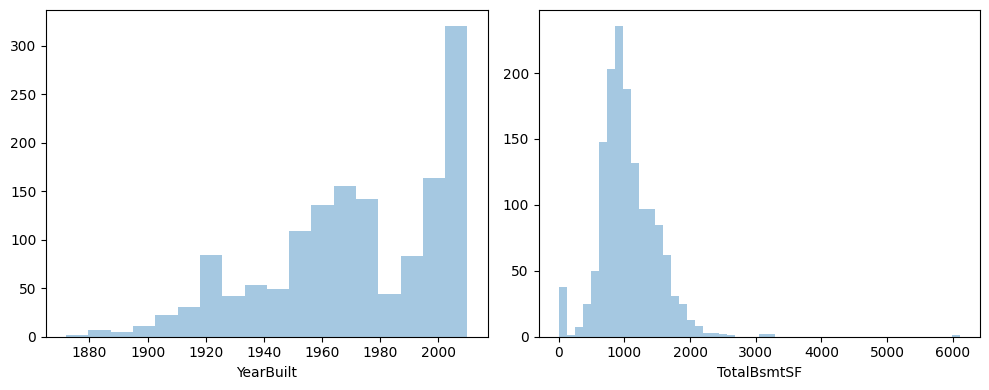

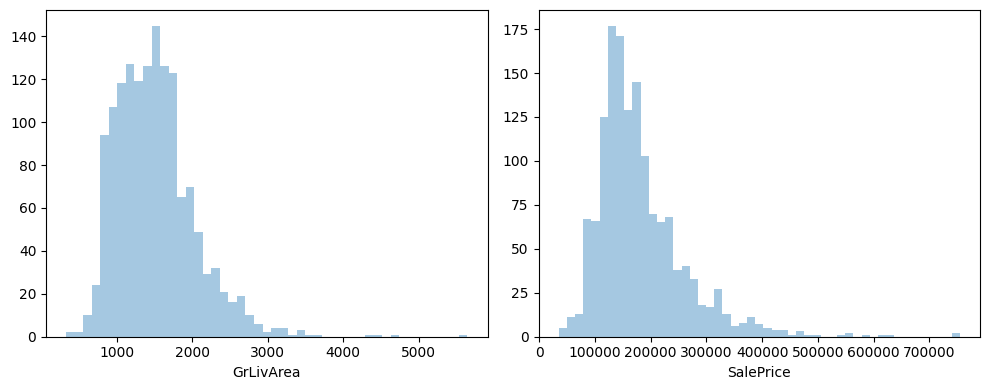

In [ ]:
import seaborn as sns

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataframe[num_cols[i]], kde=False)
        plt.subplot(122)
        sns.distplot(dataframe[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

# The Kernel Density Estimation

it is also a useful tool for plotting the shape of a distribution.

Like the histogram, the KDE plot encodes the density of observations on one axis with height along the other axis.

Plot Kernel Density Function for 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'

<ipython-input-13-e1613126ebb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i]], hist=True, kde=True)
<ipython-input-13-e1613126ebb0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i+1]], hist=True, kde=True)


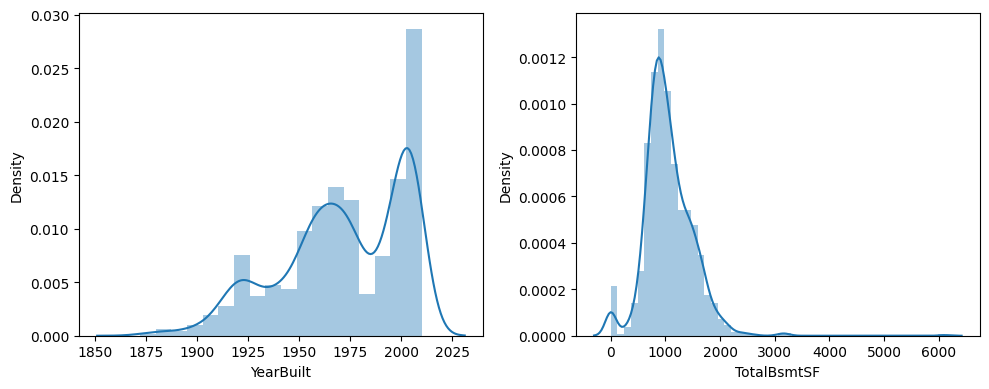

<ipython-input-13-e1613126ebb0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i]], hist=True, kde=True)
<ipython-input-13-e1613126ebb0>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[num_cols[i+1]], hist=True, kde=True)


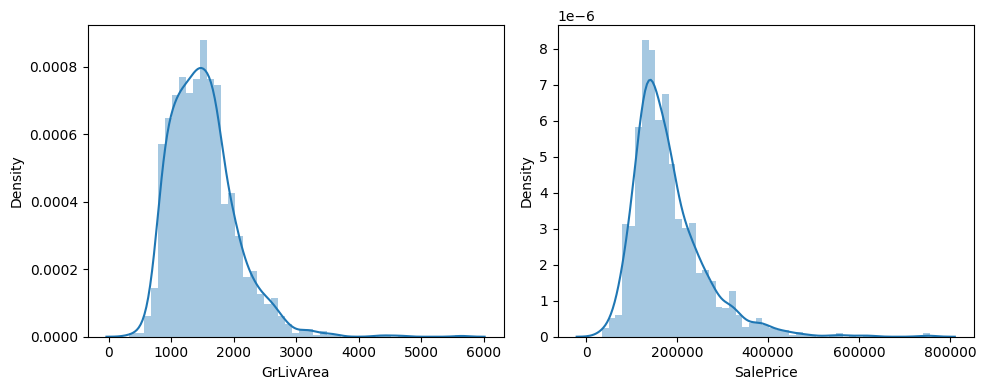

In [ ]:
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataframe[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)
        sns.distplot(dataframe[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

We can observe that all of the histograms and KDE plots are left or right skewed, hence a transformation is required to make them linear.

# Boxplots

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the quartile of the dataset while the whiskers extend to show the rest of the distribution.

Boxplots help to find the features which can be removed.

This plot is also used in multivariate analysis.

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five-number summary:

Minimum

First quartile

Median

Third quartile

Maximum

In the simplest box plot, the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).

A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.

**Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.

**Suspected outliers** are slightly more central versions of outliers, either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

Plot Boxplots for 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', and 'SalePrice'

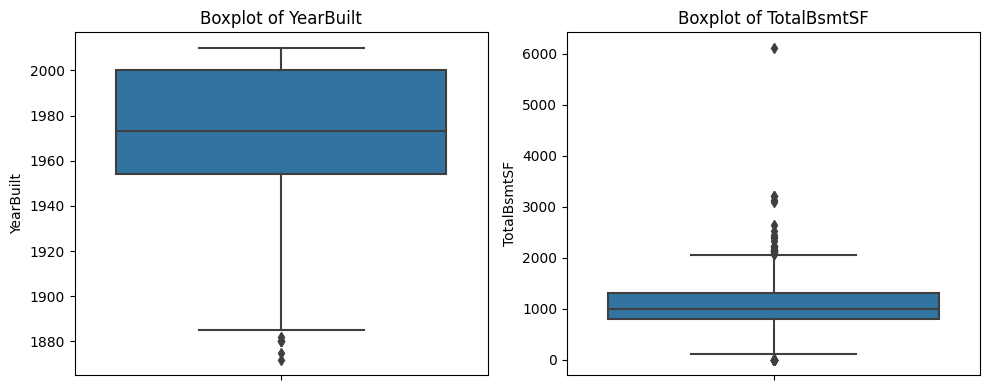

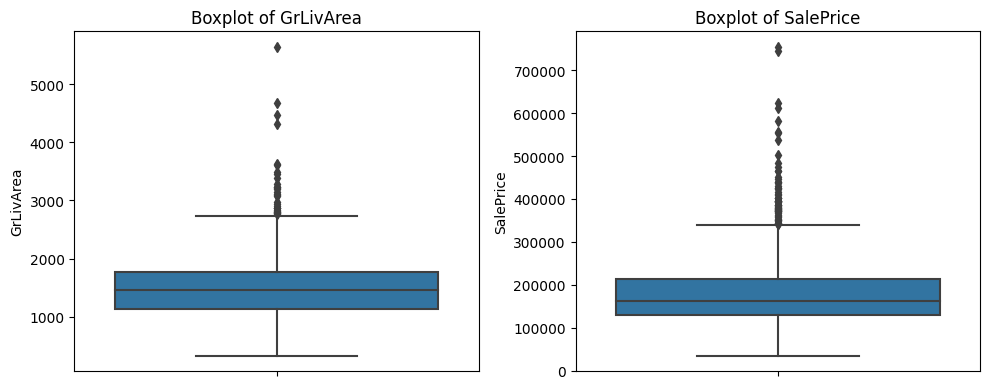

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
facet = None

for i in range(0, len(num_cols), 2):
    plt.figure(figsize=(10, 4))

    plt.subplot(121)
    sns.boxplot(x=facet, y=num_cols[i], data=dataframe)
    plt.title(f'Boxplot of {num_cols[i]}')

    plt.subplot(122)
    sns.boxplot(x=facet, y=num_cols[i + 1], data=dataframe)
    plt.title(f'Boxplot of {num_cols[i + 1]}')

    plt.tight_layout()
    plt.show()


# Observation:

Plot Boxplots for 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', and 'SalePrice' show some outliers, which are represented by dots.

### Univariate Analysis for Categorical Variable


Most of the buildings are built post 1960 and most houses have an area in the range 1-2k sq feet. There are quite a few outliers in the sale price and living area and these might be correlated. We need to check the distribution of the categorical columns.

We chose the following columns from the above categorical_features_columns :

Neighborhood

SaleCondition

# Countplot for Categorical Feature 'SaleCondition'

This plots histograms of the variable

<Axes: xlabel='SaleCondition', ylabel='count'>

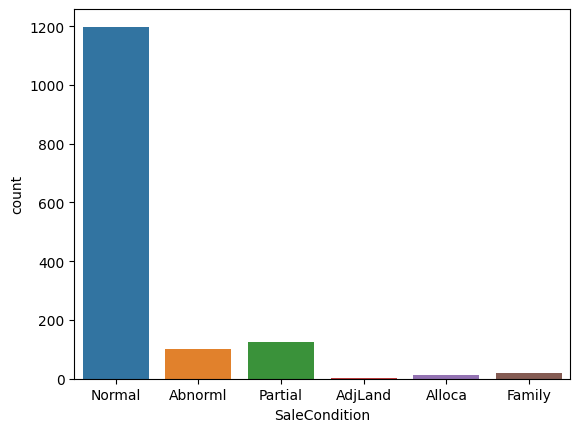

In [ ]:

# Assuming 'dataframe' is the DataFrame you are working with
sns.countplot(x='SaleCondition', data=dataframe)


Countplot For Categorical Feature 'Neighborhood'

<Axes: xlabel='count', ylabel='Neighborhood'>

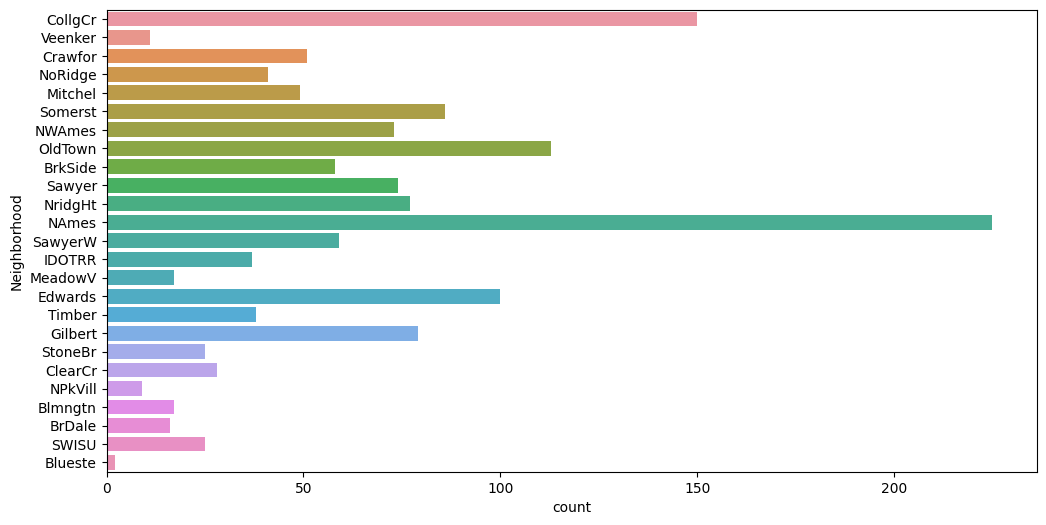

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot(y='Neighborhood', data=dataframe)

In the above graph, we can see the count of observations in each categorical bin using bars in the y-axis.

# Multivariate Analysis

In multivariate analysis, we try to find the relations between multiple variables. Obviously, in real-life problems, variables can be any combination of numeric or categorical variables. The combinations are:

Numeric vs. Numeric

Numeric vs. Categorical

Categorical vs. Categorical

Another aspect of variable combination are:

Feature vs. Feature
Feature vs. Target

# Numeric vs. Numeric

For these kind of plots we use a scatterplot of the two variables. Although one can use a variety of plots in seaborn to do a quick and dirty EDA to some sophisticated plots. lmplot is one of the plots to do a scatterplot in seaborn, it'll by default fit a regression line on top which you can control using 'fit_reg' argument.

Now we will plot some important feature against our target.

# Plot 'GrLivArea' against 'SalePrice'

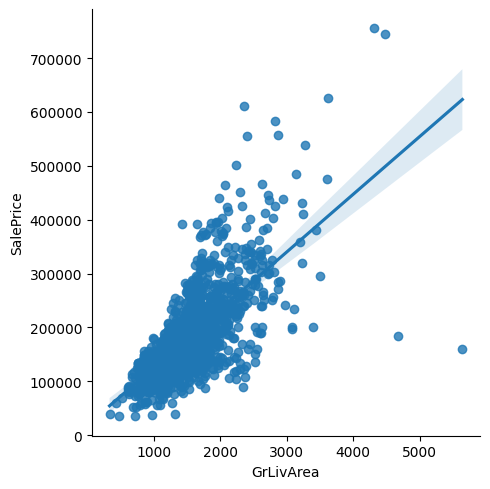

In [ ]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=dataframe, fit_reg=True)

Using a scatterplot we can also detect multivariate outliers, in this case there are two houses which have an area above ~4500 and they don't follow the trend. Removing these would give a better fit.

Another plot that we can use is a jointplot which gives a plethora of information in a single plot. It has:

Scatter Plot

Regression line fit to the data.

Histogram and KDE of individual variables.

Pearson correlation and p value.

# Plot 'TotalBsmtSF' against 'SalePrice'

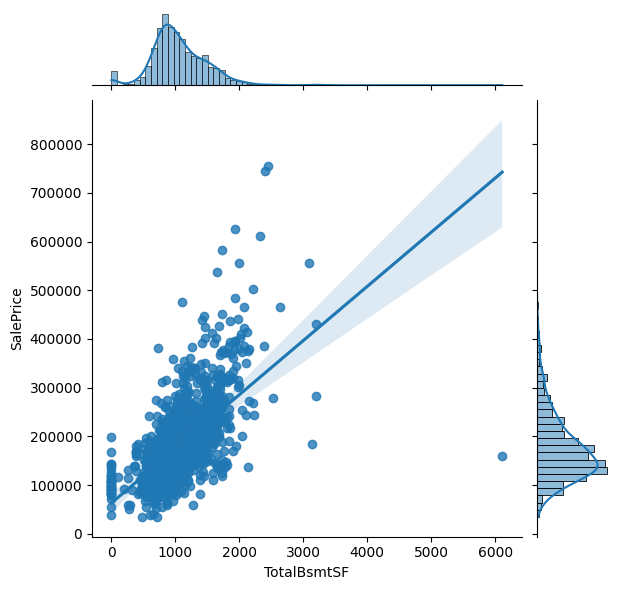

In [ ]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=dataframe, kind='reg')

Another plot one can use is a hexplot which plots two numeric variables. Darker colors signify more points

# Plot 'YearBuilt' against 'SalePrice'

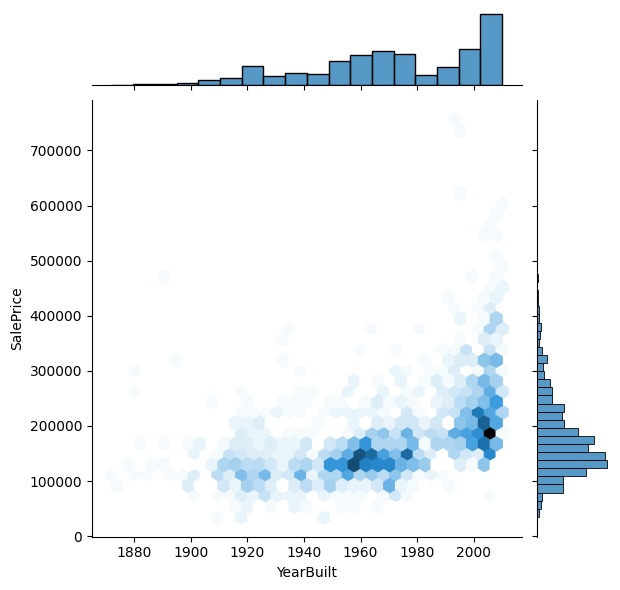

In [ ]:
sns.jointplot(x='YearBuilt', y='SalePrice', data=dataframe, kind='hex')

<ipython-input-22-425bafb7a5ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), cmap='viridis')


<Axes: >

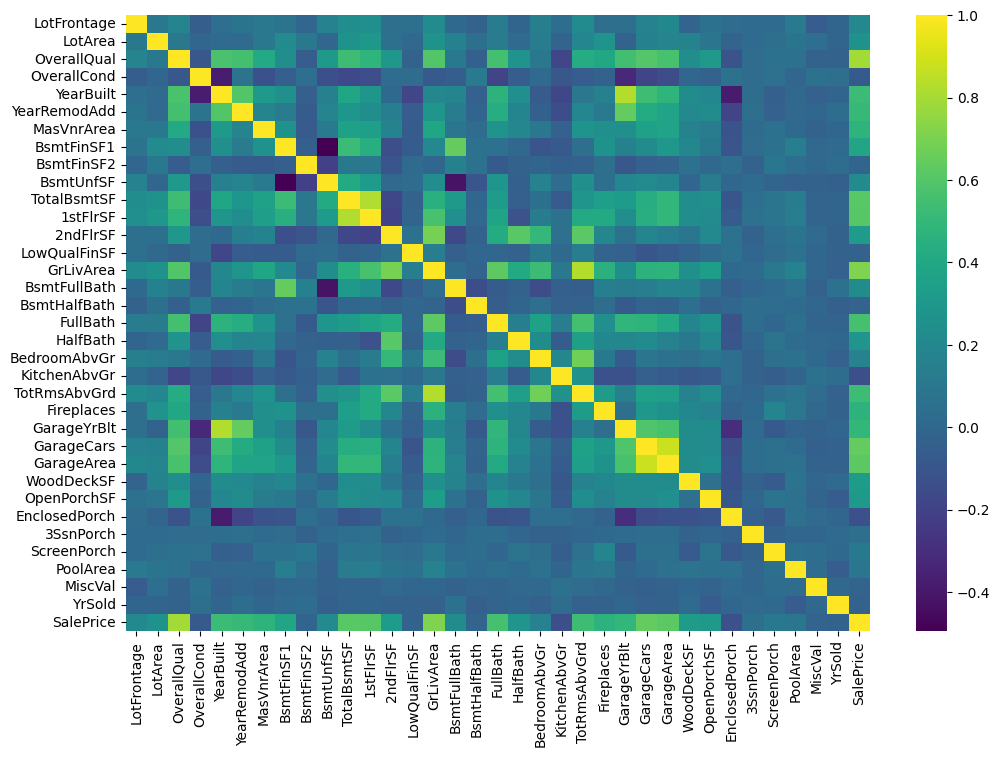

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(), cmap='viridis')

We can see the following inferences from above -

A lot of variables are correlated to SalePrice which is good.
GrLivArea is highly correlated with TotRmsAbvGrd.
Also year the garage was built(GarageYrBlt) is correlated with the year the building was built(YearBuilt).

# It's a good idea to remove such correlated variables during feature selection.

Now we plot some top variables to see the relations between them. We starts by filtering top 10 variables which are highly correlated with SalePrice.

<ipython-input-23-33e818ee07a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = dataframe.corr().nlargest(k, 'SalePrice')['SalePrice'].index


<Axes: >

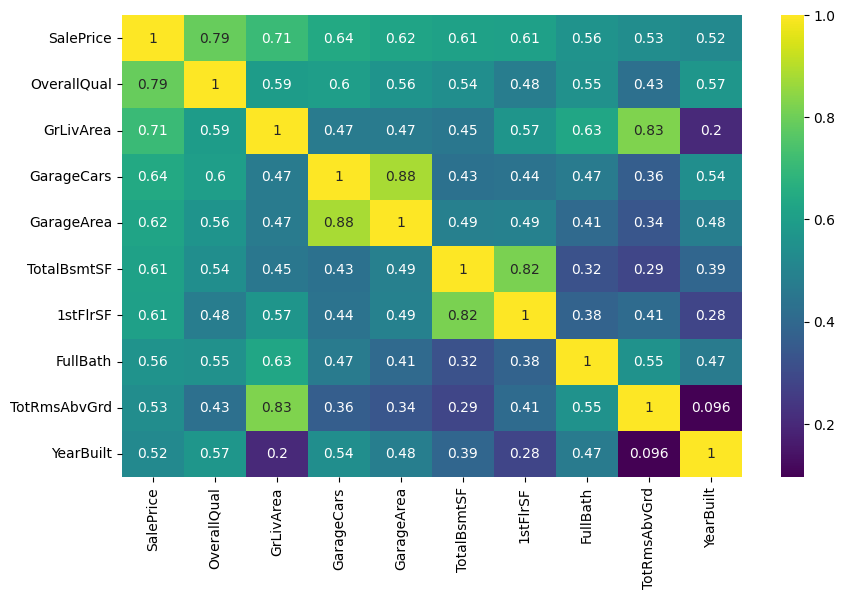

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = dataframe.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = dataframe[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.

'GarageCars' and 'GarageArea' are also correlated variables. However no. of cars that can fit into a garage is dependent on the garage area and one can remove one of these. Check the correlation between them.

TotalBsmtSF and 1stFlrSF are also highy correlated. We can drop one of these.

As pointed out above Yearbuilt and TotRmsAbvGrd are highly correlated, we'll discard TotRmsAbvGrd.

An easy way to plot all possible interactions is between a set of numeric variables is using pairplot function in seaborn.

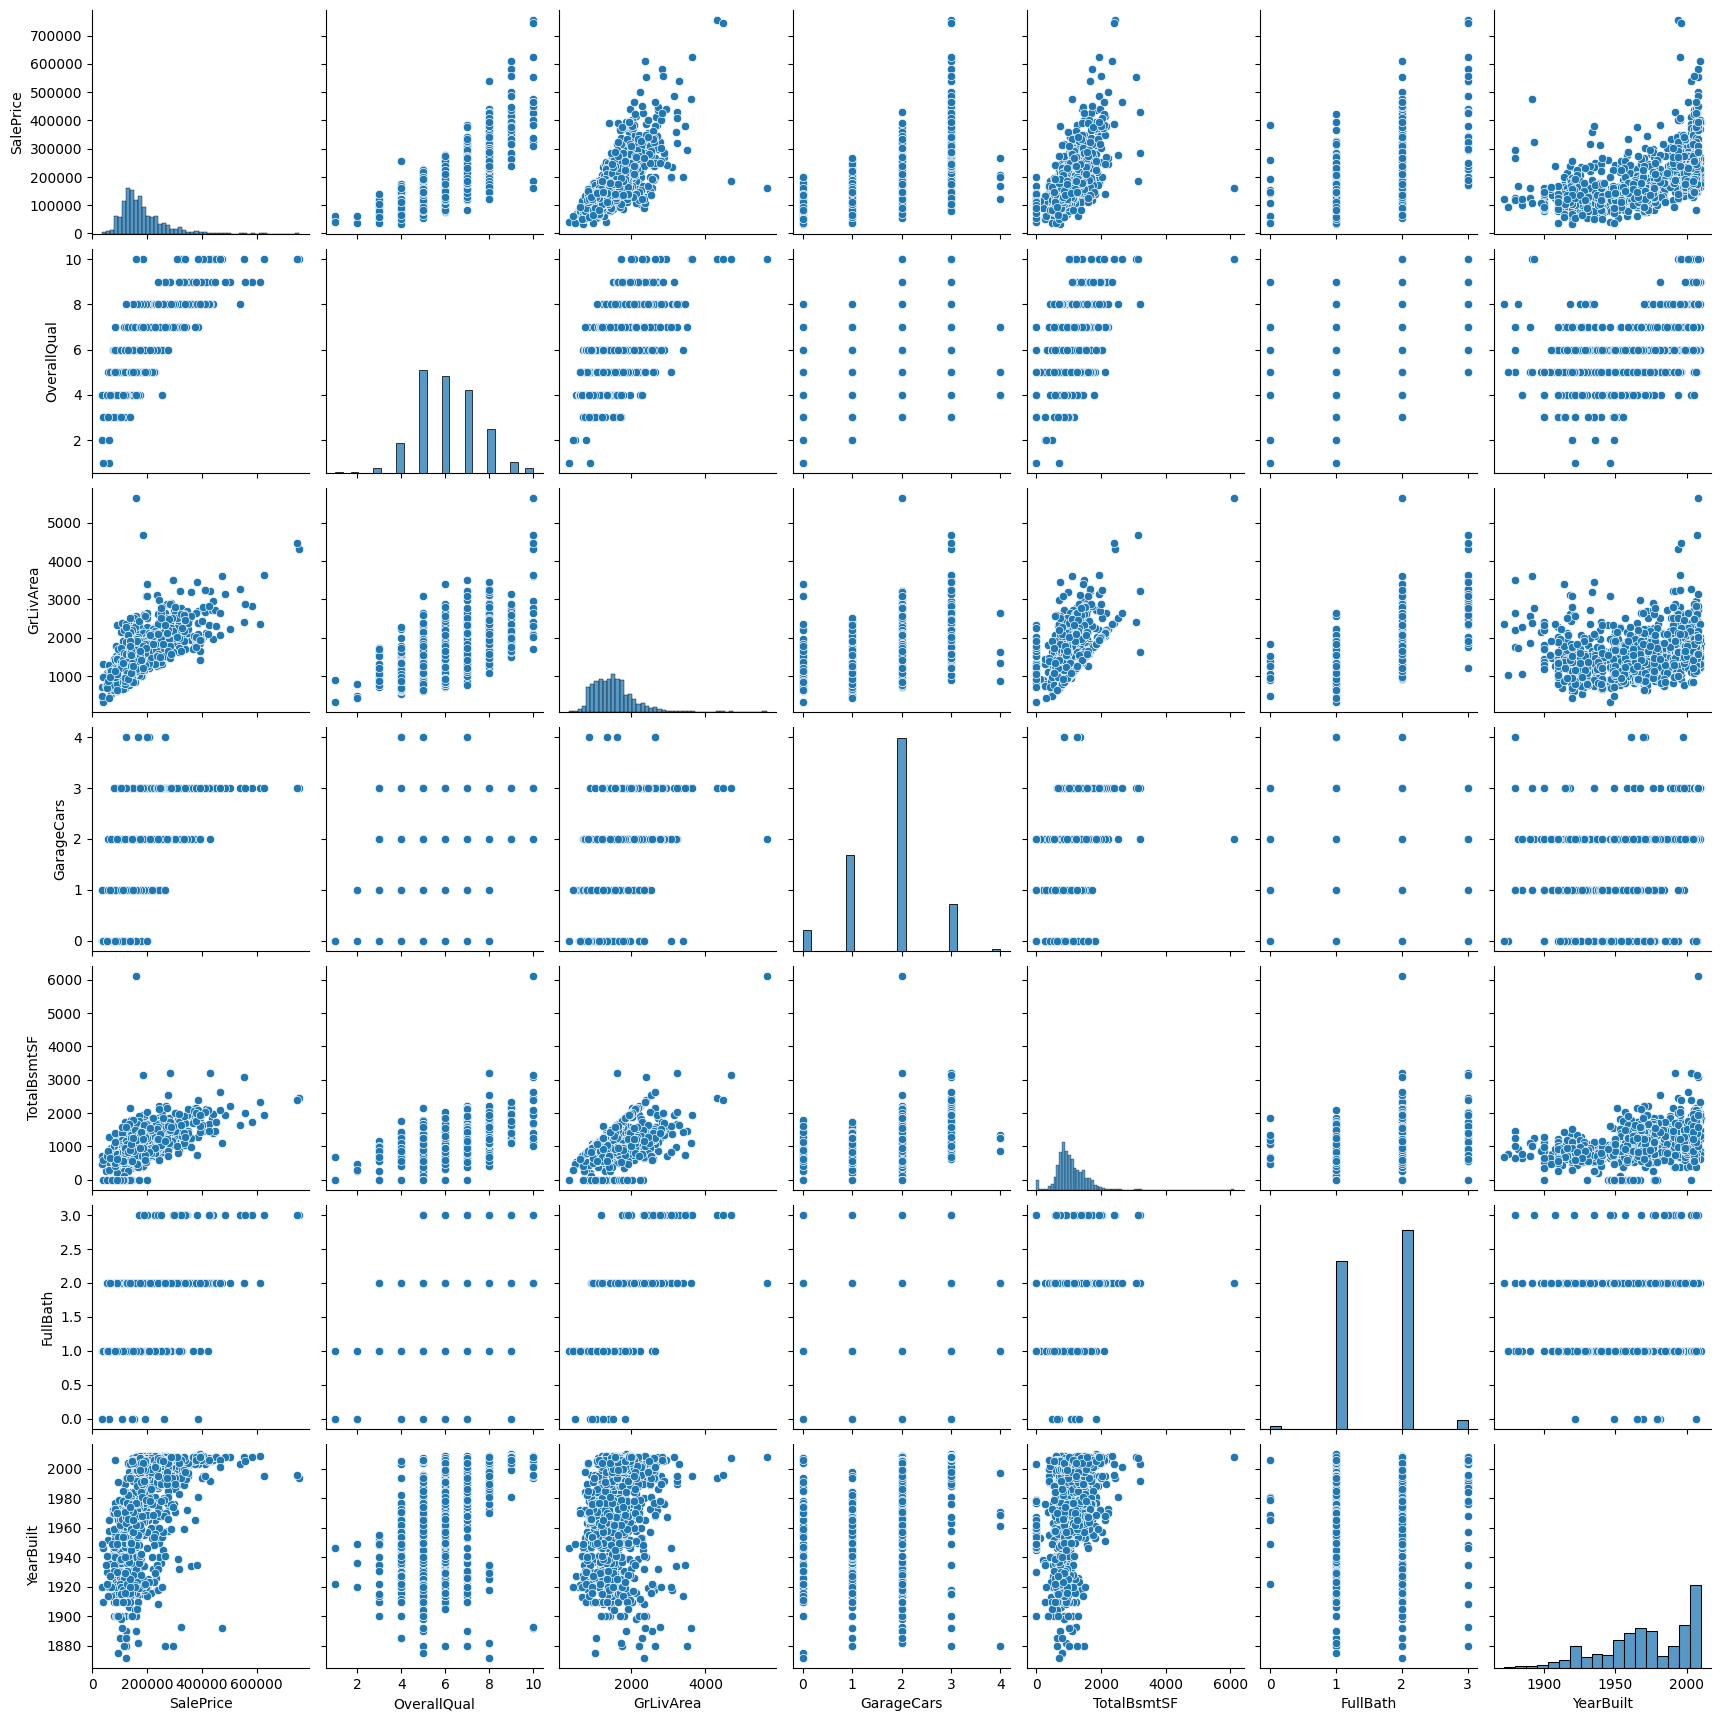

In [ ]:
# Visualizing relations between all major variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataframe[cols])

We notice a few interesting things here, in the scatter plot of TotalBsmtSF and GrLivArea, there is a line below which most TotalBsmtSF values fall in which makes sense as the area of basement usually is lesser than living area. Also there is an exponential increase in SalePrice vs Yearbuilt in the recent past.

# Numeric vs. Categorical

To plot these relations we can use boxplots and swarmplots. We can create these using boxplot function in seaborn. We create a boxplot for numerical variables grouped by categories in categorical variable.

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

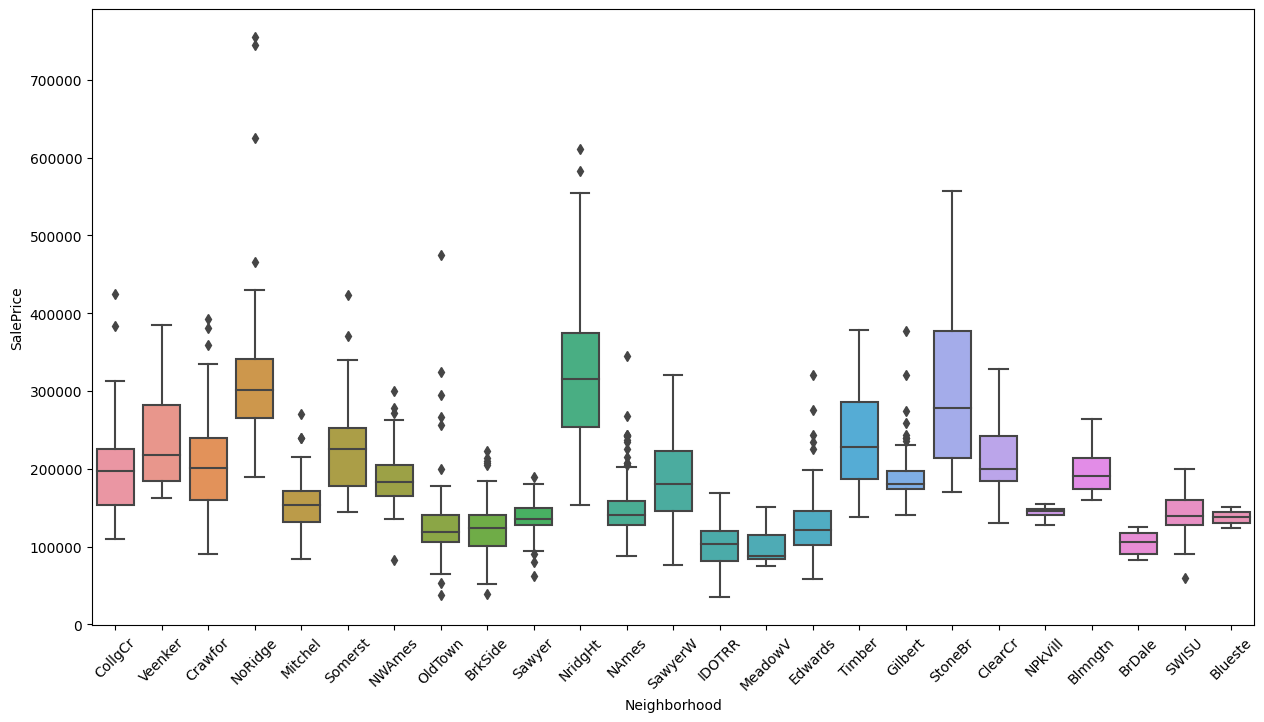

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot(x='Neighborhood',y='SalePrice', data=dataframe)

We can conclude that the distribution of SalePrice changes with the individual neighborhoods and can be a good predictor for it.

Next we take a look at swarmplots which are similar to boxplots, but they also show no. of points at each value of numerical variable. A denser plot signifies more observations in it.

#Categorical vs. Categorical

This can be done using using crosstab or graphically using a stacked barplot. We consider two variables 'Neighborhood' and 'OverallQual' and check the relation between them using both of these.

In [ ]:
crosstab = pd.crosstab(index=dataframe["Neighborhood"], columns=dataframe["OverallQual"])
crosstab

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


<Axes: xlabel='Neighborhood'>

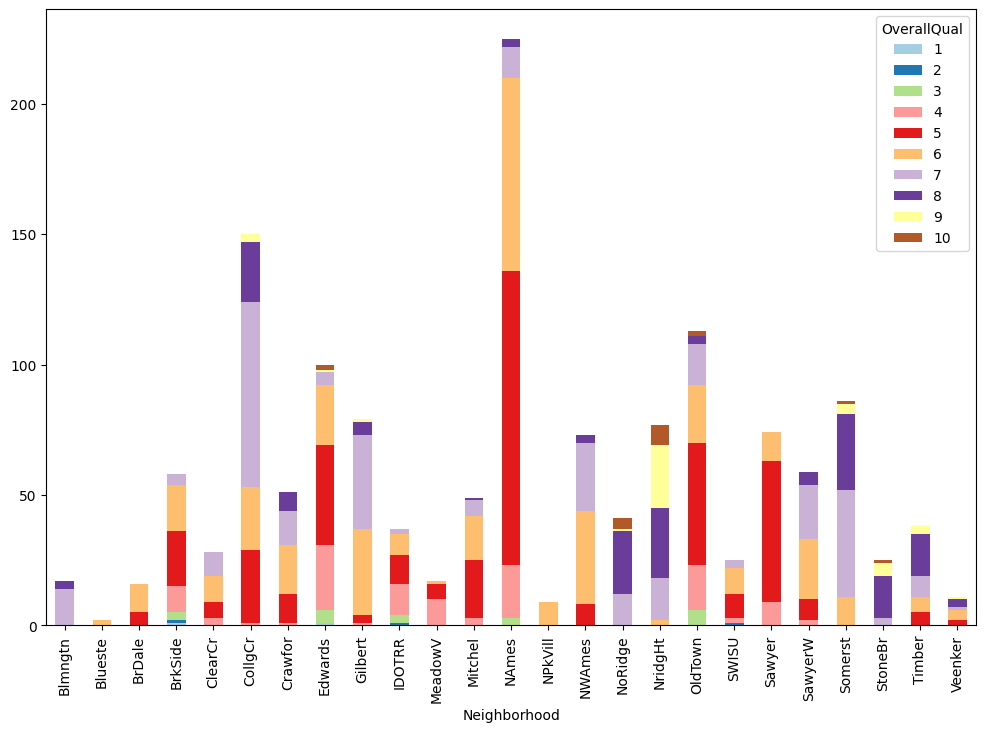

In [ ]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')